In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
tl = plt.tight_layout
%autosave 10

Autosaving every 10 seconds


In [2]:
pylab.rcParams['figure.figsize'] = (12, 5)

In [3]:
df = pd.read_csv("train.csv")
original = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


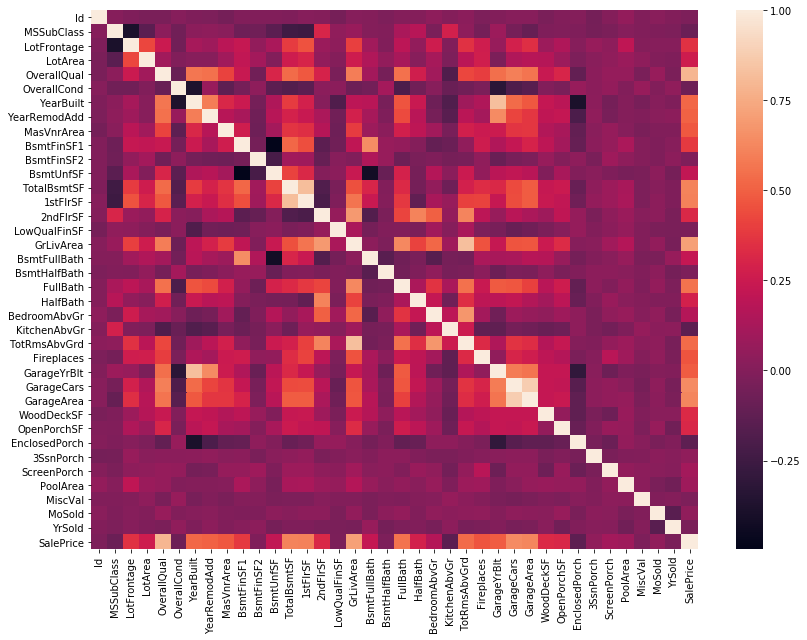

In [4]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);
tl()

# Removing unnecessary features

In [5]:
not_required = ["Id", "Street", "Alley", "Neighborhood", "Condition2",
                "Heating", "GarageYrBlt", "PoolArea", "PoolQC", 
                "Fence", "MoSold", "FireplaceQu", "3SsnPorch",
                "GarageCars", "MiscFeature"]
required = set(df.columns.tolist()) - set(not_required)
required = list(required)
original_columns_list = required
df = df[required]
df.head()

,GarageArea,BsmtUnfSF,LotFrontage,Utilities,LotArea,MasVnrArea,Functional,GarageCond,HalfBath,SalePrice,...,ExterQual,BsmtFullBath,LotConfig,Fireplaces,Exterior1st,YearBuilt,RoofMatl,LowQualFinSF,OverallQual,BsmtCond
0,548,150,65.0,AllPub,8450,196.0,Typ,TA,1,208500,...,Gd,1,Inside,0,VinylSd,2003,CompShg,0,7,TA
1,460,284,80.0,AllPub,9600,0.0,Typ,TA,0,181500,...,TA,0,FR2,1,MetalSd,1976,CompShg,0,6,TA
2,608,434,68.0,AllPub,11250,162.0,Typ,TA,1,223500,...,Gd,1,Inside,1,VinylSd,2001,CompShg,0,7,TA
3,642,540,60.0,AllPub,9550,0.0,Typ,TA,0,140000,...,TA,1,Corner,1,Wd Sdng,1915,CompShg,0,7,Gd
4,836,490,84.0,AllPub,14260,350.0,Typ,TA,1,250000,...,Gd,1,FR2,1,VinylSd,2000,CompShg,0,8,TA


# Outlier Removal

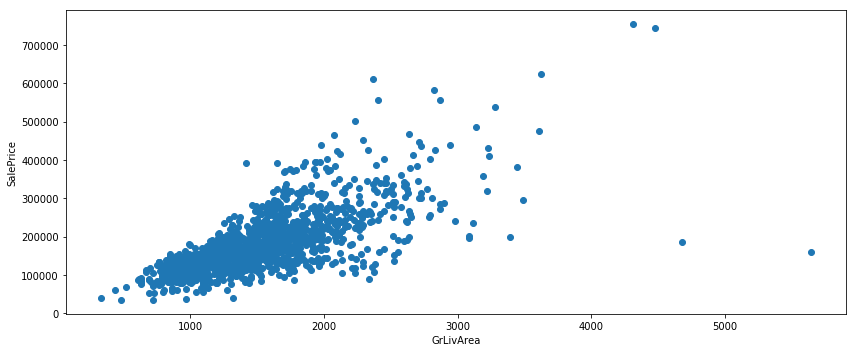

In [6]:
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
tl()

In [7]:
df = df.drop(df[(df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000)].index)

# Feature Engineering

In [8]:
from sklearn.preprocessing import LabelBinarizer

# label encode "CentralAir"

lb = LabelBinarizer()
df["CentralAir"] = lb.fit_transform(df["CentralAir"])
df.head()

,GarageArea,BsmtUnfSF,LotFrontage,Utilities,LotArea,MasVnrArea,Functional,GarageCond,HalfBath,SalePrice,...,ExterQual,BsmtFullBath,LotConfig,Fireplaces,Exterior1st,YearBuilt,RoofMatl,LowQualFinSF,OverallQual,BsmtCond
0,548,150,65.0,AllPub,8450,196.0,Typ,TA,1,208500,...,Gd,1,Inside,0,VinylSd,2003,CompShg,0,7,TA
1,460,284,80.0,AllPub,9600,0.0,Typ,TA,0,181500,...,TA,0,FR2,1,MetalSd,1976,CompShg,0,6,TA
2,608,434,68.0,AllPub,11250,162.0,Typ,TA,1,223500,...,Gd,1,Inside,1,VinylSd,2001,CompShg,0,7,TA
3,642,540,60.0,AllPub,9550,0.0,Typ,TA,0,140000,...,TA,1,Corner,1,Wd Sdng,1915,CompShg,0,7,Gd
4,836,490,84.0,AllPub,14260,350.0,Typ,TA,1,250000,...,Gd,1,FR2,1,VinylSd,2000,CompShg,0,8,TA


In [9]:
# Make YearBuilt to How Old the property is
df["YearBuilt"] = df["YearBuilt"].apply(lambda x: 2018 - x)
df["YearRemodAdd"] = df["YearRemodAdd"].apply(lambda x: 2018 - x)
df["YrSold"] = df["YrSold"].apply(lambda x: 2018 - x)

In [10]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['LotFrontage', 'MasVnrArea', 'GarageCond', 'BsmtQual', 'GarageType', 'BsmtExposure', 'GarageQual', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageFinish', 'MasVnrType', 'BsmtCond']


In [11]:
# print percentage null values
for col_name in null_having_cols:
    print("{0} : {1:.2f}".format(col_name, df[col_name].isnull().sum() / len(df)))

LotFrontage : 0.18
MasVnrArea : 0.01
GarageCond : 0.06
BsmtQual : 0.03
GarageType : 0.06
BsmtExposure : 0.03
GarageQual : 0.06
BsmtFinType1 : 0.03
BsmtFinType2 : 0.03
Electrical : 0.00
GarageFinish : 0.06
MasVnrType : 0.01
BsmtCond : 0.03


In [12]:
# replace "NA" with "NO" to avoid confusion with nan
# df["GarageType"] = df["GarageType"].fillna("NO")
# df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NO")
# df["MasVnrType"]= df["MasVnrType"].fillna("NO")
# df["BsmtExposure"]= df["BsmtExposure"].fillna("NOB") # no is already present
# df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NO")
# df["GarageType"] = df["GarageType"].fillna("NO")
# df["GarageFinish"] = df["GarageFinish"].fillna("NO")
# df["GarageCond"] = df["GarageCond"].fillna("NO")
# df["GarageQual"] = df["GarageQual"].fillna("NO")
# df["BsmtQual"] = df["BsmtQual"].fillna("NO")
# df["Electrical"] = df["Electrical"].fillna("SBrkr") # there is only 1 nan in "Electrical" 
# df["BsmtCond"] = df["BsmtCond"].fillna("NO");

# Mode
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])
# df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["MasVnrType"]= df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
# df["BsmtExposure"]= df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0]) # no is already present
# df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
# df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
# df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])
# df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
# df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0]) # there is only 1 nan in "Electrical" 
# df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

In [13]:
def exter_cond_map(cond):
    return {
        np.nan: np.nan,
        "NO": 0,
        "NA": 1,
        "Po": 2,
        "Fa": 3,
        "TA": 4,
        "Gd": 5,
        "Ex": 6
    }[cond]

exter_qual_map = exter_cond_map
heating_qc_map = exter_cond_map
kitchen_qual_map = exter_cond_map
basement_cond_map = exter_cond_map
basement_quality_map = exter_cond_map
garage_qual_map = exter_cond_map
garage_cond_map = exter_cond_map
overall_qual_map = exter_cond_map
overall_cond_map = exter_cond_map

def lot_shape_map(cond):
    return {
        np.nan: np.nan,
        "IR3": 1,
        "IR2": 2,
        "IR1": 3,
        "Reg": 4
    }[cond]

def utilities_map(cond):
    return {
        np.nan: np.nan,
        "ELO": 1,
        "NoSeWa": 2,
        "NoSewr": 3,
        "AllPub": 4
    }[cond]

def land_slope_map(cond):
    return {
        np.nan: np.nan,
        "Gtl": 1,
        "Mod": 2,
        "Sev": 3
    }[cond]

def basement_exposure_map(cond):
    return {
        np.nan: np.nan,
        "NOB": 0,
        "NA": 1,
        "No": 2,
        "Mn": 3,
        "Av": 4,
        "Gd": 5,
    }[cond]

def basement_fin_type_1_map(cond):
    return {
        np.nan: np.nan,
        "NO": 0,
        "NA": 1,
        "Unf": 2,
        "LwQ": 3,
        "Rec": 4,
        "BLQ": 5,
        "ALQ": 6,
        "GLQ": 7
    }[cond]

basement_fin_type_2_map = basement_fin_type_1_map

def functional_map(cond):
    return {
        np.nan: np.nan,
        "Sal": 0,
        "Sev": 1,
        "Maj2": 2,
        "Maj1": 3,
        "Mod": 4,
        "Min2": 5,
        "Min1": 6,
        "Typ": 7
    }[cond]

def paved_drive_map(cond):
    return {
        np.nan: np.nan,
        "No": 0,
        "N": 1,
        "P": 2,
        "Y": 3
    }[cond]

def garage_finish_map(cond):
    return {
        np.nan: np.nan,
        "NA": 0,
        "Unf": 1,
        "RFn": 2,
        "Fin": 3
    }[cond]

In [14]:
def ap(feature, map_name):
    df[feature] = df[feature].apply(map_name)

ap("ExterCond", exter_cond_map)
ap("ExterQual", exter_qual_map)
ap("HeatingQC", heating_qc_map)
ap("KitchenQual", kitchen_qual_map)
ap("BsmtQual", basement_quality_map)
ap("BsmtCond", basement_cond_map)
ap("GarageQual", garage_qual_map)
ap("GarageCond", garage_cond_map)
ap("LotShape", lot_shape_map)
ap("Utilities", utilities_map)
ap("LandSlope", land_slope_map)
ap("BsmtExposure", basement_exposure_map)
ap("BsmtFinType1", basement_fin_type_1_map)
ap("BsmtFinType2", basement_fin_type_2_map)
ap("Functional", functional_map)
ap("PavedDrive", paved_drive_map)
ap("GarageFinish", garage_finish_map)

In [15]:
def integral_columns_list(pd_df):
    int_list = []
    for col in pd_df.columns:
        if pd_df[col].dtype == np.float or pd_df[col].dtype == np.int:
            int_list.append(col)
    print("Int cols: {}".format(int_list))
    return int_list

def categorical_columns_list(pd_df):
    cat_list = []
    for col in pd_df.columns:
        if pd_df[col].dtype == np.dtype("O"):
            cat_list.append(col)
    print("Cat cols: {}".format(cat_list))
    return cat_list

In [16]:
from fancyimpute import KNN, MICE

df[integral_columns_list(df)] = KNN(10).complete(df[integral_columns_list(df)])

C:\Users\makul\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Int cols: ['LotFrontage', 'MasVnrArea', 'GarageCond', 'BsmtQual', 'BsmtExposure', 'GarageQual', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'GarageFinish', 'BsmtCond']
Imputing row 1/1458 with 0 missing, elapsed time: 0.406
Imputing row 101/1458 with 1 missing, elapsed time: 0.410
Imputing row 201/1458 with 0 missing, elapsed time: 0.410
Imputing row 301/1458 with 0 missing, elapsed time: 0.410
Imputing row 401/1458 with 0 missing, elapsed time: 0.410
Imputing row 501/1458 with 0 missing, elapsed time: 0.416
Imputing row 601/1458 with 0 missing, elapsed time: 0.416
Imputing row 701/1458 with 0 missing, elapsed time: 0.419
Imputing row 801/1458 with 0 missing, elapsed time: 0.419
Imputing row 901/1458 with 0 missing, elapsed time: 0.419
Imputing row 1001/1458 with 0 missing, elapsed time: 0.419
Imputing row 1101/1458 with 0 missing, elapsed time: 0.419
Imputing row 1201/1458 with 0 missing, elapsed time: 0.426
Imputing row 1301/1458 with 0 missing, elapsed time: 0.426
Imputing row 140

In [17]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: []


In [18]:
# from sklearn.preprocessing import Imputer

# # imputer for missing real values
# imp = Imputer(strategy="median")
# df[null_having_cols] = imp.fit_transform(df[null_having_cols])

# Transformation

In [19]:
# df["OverallQual"] = df["OverallQual"].apply(str)

In [20]:
def kill_multicollinearity(original_df):
    print("Original DF columns: {}".format(len(original_df.columns)))    
    categorical_columns = [x for x in original_df.columns.tolist() if original_df[x].dtype == np.dtype("O")]
    ip_df = pd.get_dummies(original_df.copy())
    print("Columns after one hot encode: {}".format(len(ip_df.columns)))
    print("Categorical columns: {}".format(categorical_columns))
    dropped_columns = []
    for categorical_column in categorical_columns:
        unique_values = original_df[categorical_column].unique()
        replacer = unique_values[-1] if type(unique_values[-1]) == str else unique_values[-2]
        ip_df = ip_df.drop(categorical_column + "_" + replacer, axis=1)
        print("Dropping: {}".format(unique_values[-1]))
        dropped_columns.append(categorical_column + "_" + replacer)
    print("Columns after: {}".format(len(ip_df.columns)))
    return ip_df, dropped_columns

In [21]:
df_one_hot, dropped_columns = kill_multicollinearity(df)

Original DF columns: 66
Columns after one hot encode: 166
Categorical columns: ['LandContour', 'HouseStyle', 'Foundation', 'Condition1', 'SaleCondition', 'GarageType', 'BldgType', 'MSZoning', 'SaleType', 'Exterior2nd', 'Electrical', 'RoofStyle', 'MasVnrType', 'LotConfig', 'Exterior1st', 'RoofMatl']
Dropping: HLS
Dropping: 2.5Fin
Dropping: Stone
Dropping: RRNe
Dropping: Family
Dropping: 2Types
Dropping: Twnhs
Dropping: RH
Dropping: Oth
Dropping: CBlock
Dropping: Mix
Dropping: Shed
Dropping: BrkCmn
Dropping: FR3
Dropping: CBlock
Dropping: Roll
Columns after: 150


In [22]:
from scipy.special import boxcox1p

df = df_one_hot

skew_limit = 0.8
df_skew = df.skew().sort_values()[::-1]
df_skew = df_skew[df_skew > skew_limit]
lam = 0.15

# log transformation doesn't reduce
# skewness of BsmtUnfSF

del df_skew["BsmtUnfSF"]

# idx = 1
# plt.figure(figsize=(20, 100))
# for feature in df_skew.index:
#     for switch in [0, 1]:
#         plt.subplot(len(df_skew), 2, idx)
#         if not switch:
#             plt.hist(df[feature], label="Skew: {0:.2f}".format(df[feature].skew()), edgecolor="black")
#             plt.title("{} Without transform".format(feature))
#             plt.legend()
#         else:
#             plt.hist(boxcox1p(df[feature], lam), label="Skew: {0:.2f}".format(boxcox1p(df[feature], lam).skew()), edgecolor="black")
#             plt.title("{} With Log transform".format(feature))
#             plt.legend()
#         idx += 1
# tl()

In [23]:
for feature in df_skew.index:
    df[feature] = df[feature].apply(lambda x: boxcox1p(x, lam))

In [24]:
from sklearn.preprocessing import RobustScaler, StandardScaler

X_vars = df_one_hot.columns.tolist()
X_vars.remove("SalePrice")
X = df_one_hot[X_vars]
y = df_one_hot["SalePrice"]
X_sca = RobustScaler()
X = X_sca.fit_transform(X)
y_sca = StandardScaler()
y = y_sca.fit_transform(y.values.reshape(-1, 1))

In [25]:
from sklearn.metrics import make_scorer, mean_squared_log_error

err_total = 0
ctr = 0
limit = 10
i = 0
def exp_log_err(y_true, y_pred):
    try:
        err = mean_squared_log_error(np.expm1(y_sca.inverse_transform(y_true)), 
                                      np.expm1(y_sca.inverse_transform(y_pred)))
        return err
    except Exception as e:
        print("Exception", e)
        return np.inf


error_function = make_scorer(score_func=exp_log_err, greater_is_better=False)

In [26]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_log_error
# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor

# clf_cv = XGBRegressor()

# xgb_parameters = {
# #     "learning_rate": [0.07],
# #     "max_depth": [3],
# #     "min_child_weight": [4],
# #     "gamma": [0.041],
# #     "subsample": [0.375],
# #     "colsample_bytree": [0.6877],
# #     "reg_alpha": [7.196856730011514e-05]
#     "n_estimators": np.arange(50, 500, 100),
#     "booster": ["gbtree", "gblinear", "dart"],
#     "min_child_weight": np.arange(1, 10),
#     "reg_alpha": np.linspace(0.01, 1),
#     "reg_lambda": np.linspace(0.01, 1),
#     "gamma": np.linspace(0.01, 1)
# }

# gb_parameters = {
#     "loss": ["ls", "lad", "huber", "quantile"],
#     "learning_rate": np.linspace(0.01, 0.5),
#     "n_estimators": np.floor(np.linspace(50, 5000)).astype(int),
# }

# lgbm_parameters = {
#     "boosting_type": ["gbdt", "dart", "goss", "rf"],
# #     "reg_alpha": np.linspace(0.1, 10),
#     "reg_lambda": np.linspace(0.1, 10)
# }

# ridge_parameters = {
#     "alpha": np.linspace(0.0001, 100),
#     "tol": np.linspace(0.0001, 100),
#     "normalize": [True, False],
#     "max_iter": [50000]
# }

# par_parameters = {
#     "C": np.linspace(0.9, 1),
#     "max_iter": [1000, 1500, 2000],
#     "average": [0, 1]
# }

# svr_params = {
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "degree": [1, 2, 3, 4, 5, 6, 7, 8],
#     "C": np.linspace(0.5, 1),
#     "epsilon": np.linspace(0.01, 0.2)
# }

# random_search = RandomizedSearchCV(estimator=clf_cv, param_distributions=xgb_parameters,
#                                   scoring=error_function, n_iter=10, cv=10, verbose=10)
# random_search.fit(X, y.ravel())
# print("Best est: {}".format(random_search.best_estimator_))
# print("Best loss: {}".format(random_search.best_score_))

```
Best est: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
       
Best loss: -0.0151683462003115

Best est: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3282,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best loss: -0.015400226872212349

Best est: Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, random_state=None, solver='auto', tol=100.0)
Best loss: -0.013298919575002793

Best est: PassiveAggressiveRegressor(C=0.9408163265306123, average=1, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=1000, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)
Best loss: -0.0226563802133436

Best est: SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
  epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)
Best loss: -0.02108130958313247
```

In [27]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, PassiveAggressiveRegressor, Lasso, ElasticNet, RidgeCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import KernelPCA, PCA
from scipy.special import inv_boxcox1p
avg_log_error = 0

def t(x):
    return inv_boxcox1p(y_sca.inverse_transform(x), lam)

clf1 = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# clf2 = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

clf3 = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



clf4 = Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
                   normalize=False, random_state=None, solver='auto',
                   tol=0.53522448979591837)

clf5 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# clf6 =  Lasso(alpha =0.0005, random_state=1)

clfs = [clf1, clf3, clf4, clf5]
# weightages = [5, 1, 1, 0.5, 1.5, 0.5, 0.5, 0.5]
weightages = [2, 1, 1, 2]
# weightages = [1] * len(clfs)

# pca = PCA(n_components=149)

# for train_index, test_index in KFold(n_splits=14, shuffle=True).split(X):
#     y_pred_sum = np.zeros(test_index.shape)
#     X_train = X[train_index]
#     X_test = X[test_index]
# #     print("Exp variance: {}".format(sum(pca.explained_variance_ratio_)))
#     for indx, classifier in enumerate(clfs):
#         classifier.fit(X_train, y[train_index].ravel())
#         y_pred_sum += classifier.predict(X_test) * weightages[indx]
#     y_pred = y_pred_sum / sum(weightages)
# #     clf =  XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
# #                              learning_rate=0.05, max_depth=3, 
# #                              min_child_weight=1.7817, n_estimators=2200,
# #                              reg_alpha=0.4640, reg_lambda=0.8571,
# #                              subsample=0.5213, silent=1,
# #                              random_state =7, nthread = -1)

# #     clf.fit(X[train_index], y[train_index].ravel())
# #     y_pred = clf.predict(X[test_index])
# #     y_pred[y_pred < -2] = y_pred[y_pred < -2] * 1.2
# #     y_pred[y_pred > 2] = y_pred[y_pred > 2] * 1.2
#     y_pred_t = t(y_pred)
#     y_true_t = t(y[test_index])
#     y_pred_t[y_pred_t > 400000] = y_pred_t[y_pred_t > 400000] * 1.03
#     y_pred_t[y_pred_t < 100000] = y_pred_t[y_pred_t < 100000] * 0.97
#     plt.scatter(y_pred_t, y_true_t)
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.xlim((0, 700000))
#     plt.ylim((0, 700000))
#     plt.plot([-100, 1e6], [-100, 1e6])
#     tl()
#     plt.show()
# #     err = 
#     err = mean_squared_log_error(y_true_t, y_pred_t)
#     print("Err: {}".format(err))
#     avg_log_error += err
# print("Avg log error: {}".format(avg_log_error/14))



In [28]:
# X = pca.fit_transform(X)

In [29]:
for classifier in clfs:
        classifier.fit(X, y.ravel())

# Deep Learning

In [30]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv1D
# from keras.losses import mean_squared_logarithmic_error, mean_squared_error

# model = Sequential()

# model.add(Dense(128, input_shape=(X.shape[1], )))
# model.add(Dropout(0.2))
# model.add(Activation("relu"))

# model.add(BatchNormalization())

# model.add(Dense(64))
# model.add(Dropout(0.2))
# model.add(Activation("relu"))

# model.add(BatchNormalization())

# model.add(Dense(32))
# model.add(Dropout(0.2))
# model.add(Activation("relu"))

# model.add(BatchNormalization())

# model.add(Dense(16))
# model.add(Dropout(0.2))
# model.add(Activation("relu"))

# model.add(BatchNormalization())

# model.add(Dense(1))

# model.compile(optimizer="adam", loss=mean_squared_logarithmic_error, 
#               metrics=[mean_squared_logarithmic_error, mean_squared_error])

In [31]:
# model.fit(X, y.ravel(), epochs=500, batch_size=32)

# Testing

In [32]:
test_df = pd.read_csv("test.csv")
original_columns_list.remove("SalePrice")
test_df = test_df[original_columns_list]
test_df.head()

,GarageArea,BsmtUnfSF,LotFrontage,Utilities,LotArea,MasVnrArea,Functional,GarageCond,HalfBath,1stFlrSF,...,ExterQual,BsmtFullBath,LotConfig,Fireplaces,Exterior1st,YearBuilt,RoofMatl,LowQualFinSF,OverallQual,BsmtCond
0,730.0,270.0,80.0,AllPub,11622,0.0,Typ,TA,0,896,...,TA,0.0,Inside,0,VinylSd,1961,CompShg,0,5,TA
1,312.0,406.0,81.0,AllPub,14267,108.0,Typ,TA,1,1329,...,TA,0.0,Corner,0,Wd Sdng,1958,CompShg,0,6,TA
2,482.0,137.0,74.0,AllPub,13830,0.0,Typ,TA,1,928,...,TA,0.0,Inside,1,VinylSd,1997,CompShg,0,5,TA
3,470.0,324.0,78.0,AllPub,9978,20.0,Typ,TA,1,926,...,TA,0.0,Inside,1,VinylSd,1998,CompShg,0,6,TA
4,506.0,1017.0,43.0,AllPub,5005,0.0,Typ,TA,0,1280,...,Gd,0.0,Inside,0,HdBoard,1992,CompShg,0,8,TA


In [33]:
# Make YearBuilt to How Old the property is
test_df["YearBuilt"] = test_df["YearBuilt"].apply(lambda x: 2018 - x)
test_df["YearRemodAdd"] = test_df["YearRemodAdd"].apply(lambda x: 2018 - x)
test_df["YrSold"] = test_df["YrSold"].apply(lambda x: 2018 - x)

# label binarize CentralAir
test_df["CentralAir"] = lb.transform(test_df["CentralAir"])

In [34]:
# check which cols have null values
null_having_cols_test = test_df.isnull().any()
null_having_cols_test = null_having_cols_test[null_having_cols_test == True]
null_having_cols_test = null_having_cols_test.index.tolist()
print("Columns with null values: {}".format(null_having_cols_test))

Columns with null values: ['GarageArea', 'BsmtUnfSF', 'LotFrontage', 'Utilities', 'MasVnrArea', 'Functional', 'GarageCond', 'TotalBsmtSF', 'BsmtQual', 'KitchenQual', 'GarageType', 'BsmtHalfBath', 'BsmtFinSF1', 'MSZoning', 'SaleType', 'BsmtExposure', 'GarageQual', 'BsmtFinType1', 'BsmtFinType2', 'Exterior2nd', 'BsmtFinSF2', 'GarageFinish', 'MasVnrType', 'BsmtFullBath', 'Exterior1st', 'BsmtCond']


In [35]:
# Create custom imputer
from sklearn.base import TransformerMixin

class StringImputer(TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.fill = pd.Series([original[c].value_counts().index[0]
            if original[c].dtype == np.dtype("O") else np.nan
                             for c in X], index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [36]:
simp = StringImputer()
test_df = simp.fit_transform(test_df)

In [37]:
def apt(feature, map_name):
    test_df[feature] = test_df[feature].apply(map_name)

apt("ExterCond", exter_cond_map)
apt("ExterQual", exter_qual_map)
apt("HeatingQC", heating_qc_map)
apt("KitchenQual", kitchen_qual_map)
apt("BsmtQual", basement_quality_map)
apt("BsmtCond", basement_cond_map)
apt("GarageQual", garage_qual_map)
apt("GarageCond", garage_cond_map)
apt("LotShape", lot_shape_map)
apt("Utilities", utilities_map)
apt("LandSlope", land_slope_map)
apt("BsmtExposure", basement_exposure_map)
apt("BsmtFinType1", basement_fin_type_1_map)
apt("BsmtFinType2", basement_fin_type_2_map)
apt("Functional", functional_map)
apt("PavedDrive", paved_drive_map)
apt("GarageFinish", garage_finish_map)

In [38]:
test_df[integral_columns_list(test_df)] = KNN(10).complete(test_df[integral_columns_list(test_df)])

Int cols: ['GarageArea', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'BsmtHalfBath', 'BsmtFinSF1', 'CentralAir', 'BsmtFinSF2', 'BsmtFullBath']
Imputing row 1/1459 with 0 missing, elapsed time: 0.530
Imputing row 101/1459 with 0 missing, elapsed time: 0.532
Imputing row 201/1459 with 0 missing, elapsed time: 0.535
Imputing row 301/1459 with 0 missing, elapsed time: 0.539
Imputing row 401/1459 with 0 missing, elapsed time: 0.542
Imputing row 501/1459 with 0 missing, elapsed time: 0.544
Imputing row 601/1459 with 0 missing, elapsed time: 0.547
Imputing row 701/1459 with 0 missing, elapsed time: 0.549
Imputing row 801/1459 with 0 missing, elapsed time: 0.551
Imputing row 901/1459 with 0 missing, elapsed time: 0.553
Imputing row 1001/1459 with 0 missing, elapsed time: 0.557
Imputing row 1101/1459 with 0 missing, elapsed time: 0.560
Imputing row 1201/1459 with 0 missing, elapsed time: 0.563
Imputing row 1301/1459 with 0 missing, elapsed time: 0.566
Imputing row 1401/1459 with 0 

In [39]:
# print percentage null values
for col_name in null_having_cols:
    print("Name: {0}   \tCount: {1}\tPer: {2:.2f}  Type: {3}".format(col_name, 
            test_df[col_name].isnull().sum(), test_df[col_name].isnull().sum() / len(df),
            test_df[col_name].dtype))

In [40]:
test_df_one_hot = pd.get_dummies(test_df)

In [41]:
unset_cols = set(X_vars) - set(test_df_one_hot.columns)
for unset in unset_cols:
    print("Setting : {}".format(unset))
    test_df_one_hot[unset] = 0

Setting : Exterior1st_Stone
Setting : RoofMatl_Metal
Setting : Exterior2nd_Other
Setting : Exterior1st_ImStucc
Setting : RoofMatl_Membran


In [42]:
# log transform
del df_skew["SalePrice"]
test_df = test_df_one_hot
for feature in df_skew.index:
    print("Applying to: {}".format(feature))
    test_df[feature] = test_df[feature].apply(lambda x: boxcox1p(x, lam))

Applying to: RoofMatl_Metal
Applying to: RoofMatl_Membran
Applying to: Exterior2nd_Other
Applying to: Exterior1st_AsphShn
Applying to: Exterior1st_ImStucc
Applying to: SaleType_Con
Applying to: Exterior1st_BrkComm
Applying to: Exterior1st_Stone
Applying to: MiscVal
Applying to: Electrical_FuseP
Applying to: Foundation_Wood
Applying to: Exterior2nd_AsphShn
Applying to: SaleCondition_AdjLand
Applying to: SaleType_CWD
Applying to: RoofMatl_WdShake
Applying to: SaleType_ConLw
Applying to: Exterior2nd_Stone
Applying to: Condition1_RRNn
Applying to: SaleType_ConLI
Applying to: RoofMatl_WdShngl
Applying to: Exterior2nd_Brk Cmn
Applying to: RoofStyle_Mansard
Applying to: Condition1_PosA
Applying to: SaleType_ConLD
Applying to: GarageType_CarPort
Applying to: LotArea
Applying to: MSZoning_C (all)
Applying to: Exterior2nd_ImStucc
Applying to: HouseStyle_2.5Unf
Applying to: RoofStyle_Gambrel
Applying to: RoofMatl_Tar&Grv
Applying to: Condition1_RRAe
Applying to: SaleCondition_Alloca
Applying to: 

In [43]:
for column in dropped_columns:
    if column in test_df_one_hot.columns:
        test_df_one_hot = test_df_one_hot.drop(column, axis=1)
        print("Deleting: {}".format(column))

Deleting: LandContour_HLS
Deleting: Foundation_Stone
Deleting: Condition1_RRNe
Deleting: SaleCondition_Family
Deleting: GarageType_2Types
Deleting: BldgType_Twnhs
Deleting: MSZoning_RH
Deleting: SaleType_Oth
Deleting: Exterior2nd_CBlock
Deleting: RoofStyle_Shed
Deleting: MasVnrType_BrkCmn
Deleting: LotConfig_FR3
Deleting: Exterior1st_CBlock


In [44]:
test_final_df = pd.DataFrame()

for index, col_name in enumerate(df_one_hot.columns):
    if col_name == "SalePrice":
        continue
    test_final_df[col_name] = test_df_one_hot[col_name]

In [45]:
# results_tf = model.predict(X_sca.transform(test_final_df))

In [46]:
# test_final_df["MasVnrArea"] = test_final_df["MasVnrArea"].fillna(0)

In [47]:
results = np.zeros(test_final_df.shape[0])
for idx, classifiers in enumerate(clfs):
    X_test = X_sca.transform(test_final_df)
#     X_test = pca.transform(X_test)
    results += (classifiers.predict(X_test) * weightages[idx])

In [48]:
# add keras mode
# results += model.predict(X_sca.transform(test_final_df)).flatten()

In [49]:
results /= sum(weightages)

In [50]:
# x = np.expm1(results)
x = inv_boxcox1p(y_sca.inverse_transform(results), lam)
# x_tf = inv_boxcox1p(y_sca.inverse_transform(results_tf), lam)

In [51]:
x[x > 300000] = x[x > 300000] * 1.1
x[x < 100000] = x[x < 100000] * 0.97

# x_tf[x_tf > 400000] = x_tf[x_tf > 400000] * 1.03
# x_tf[x_tf < 100000] = x_tf[x_tf < 100000] * 0.97

In [52]:
test_df = pd.read_csv("test.csv")

In [53]:
with open("results.csv", "w") as out:
    out.write("Id,SalePrice\n")
    for indx, row in test_df.iterrows():
        out.write("{}, {}\n".format(row["Id"], x[indx]))

In [54]:
x_tf[:10].ravel()

NameError: name 'x_tf' is not defined

In [ ]:
x[:10]